# Simple forecasting techniques

## The importance of a baseline model

In this notebook we will explore some simple forecasting techniques.  Selecting one of these simple techniques should be one of your early decisions in a time series forecasting project. Although each represents a simple approach to forecasting they are from a family of techniques used for setting a statistical baseline. Before you move onto complex methods (i.e., prophet) make sure you use a benchmark or baseline.  Any complex model must be better than the baseline to be considered for forecasting.  This is a often a missed step in forecasting where there is a temptation to use complex methods.

The methods we will explore are:

* Naive Forecast 1
* Seasonal Naive

We will also briefly introduce **Prediction Intervals** and measuring **forecast error**.

### Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
style.use('ggplot') # Emulates "ggplot" in R

import sys

import warnings
warnings.filterwarnings('ignore')

### Helper function

In [68]:
def preds_as_series(data, preds):
    '''
    Helper function for plotting predictions.
    Converts a numpy array of predictions to a 
    pandas.DataFrame with datetimeindex
    
    Parameters
    -----
    preds - numpy.array, vector of predictions
    start - start date of the time series
    freq - the frequency of the time series e.g 'MS' or 'D'
    '''
    start = pd.date_range(start=data.index.max(), periods=2, freq=data.index.freq).max()
    idx = pd.date_range(start=start, periods=len(preds), freq=data.index.freq)
    return pd.DataFrame(preds, index=idx)

### The ED arrivals dataset.

The dataset we will use represent daily adult (age > 18) arrivals to an Emergency Department.  The simulated observations are based on attendences at a real emergency department between Jan 2017 and Dec 2017.

In [69]:
# the url link means you are downloading this data directly from the HSMA github repo.
url = 'https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/main/data/' \
        + 'ed_attends.csv'
ed_daily = pd.read_csv(url,
                       parse_dates=True,
                       index_col='date')
ed_daily.index.freq = 'D'

In [95]:
ed_daily.shape

(344, 1)

In [71]:
ed_daily.index.min()

Timestamp('2017-01-22 00:00:00', freq='D')

In [72]:
ed_daily.index.max()

Timestamp('2017-12-31 00:00:00', freq='D')

In [98]:
ed_daily.head()


,actuals
date,
2017-01-22,161
2017-01-23,201
2017-01-24,189
2017-01-25,198
2017-01-26,226


### Visualise the time series

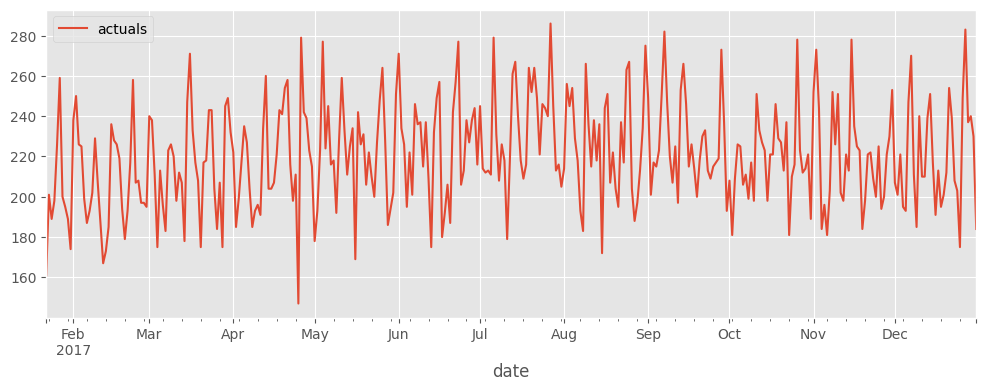

In [74]:
# We can see some spikes, peaks and troughs
# however not all that clear so may need to explore further...
_ = ed_daily.plot(figsize=(12,4))

### Naive Forecast 1

A popular baseline forecast is Naive Forecast 1.  This simply takes the last value in the time series and extrapolates it forward over the forecast horizon.  I.e.

**Naive Forecast = Last value in the time series**
*So if final value of the ts is, all future predictions will also be 10!*

In mathematical notation:

$\hat{y}_{T+h|T} =y_t$

PenCHORD has implemented some simple classes for baseline forecasts in a package called `forecast-tools`.  

For a Naive 1 forecast the class to use is

```python
forecast_tools.baseline.Naive1
```

There are three steps to use it

* Create an instance of the class
* Call the `fit` method and pass in the historical data
* Call the `predict` method and pass in a chosen forecast horizon e.g. 28 days. 

In [75]:
# Import library
from forecast_tools.baseline import Naive1

In [103]:
# accesing help...
# help(Naive1)

# print(type(nf1))
print(type(nf1.fittedvalues))

<class 'pandas.core.series.Series'>


In [77]:
# Create instance, fit the data and predict...
nf1 = Naive1()
nf1.fit(ed_daily)
nf1_preds = nf1.predict(horizon=28)
nf1.fittedvalues

date
2017-01-22      NaN
2017-01-23    161.0
2017-01-24    201.0
2017-01-25    189.0
2017-01-26    198.0
              ...  
2017-12-27    249.0
2017-12-28    283.0
2017-12-29    237.0
2017-12-30    240.0
2017-12-31    230.0
Freq: D, Name: pred, Length: 344, dtype: float64

In [78]:
# lets have a little look
nf1_preds

array([184., 184., 184., 184., 184., 184., 184., 184., 184., 184., 184.,
       184., 184., 184., 184., 184., 184., 184., 184., 184., 184., 184.,
       184., 184., 184., 184., 184., 184.])

Let's visualise the forecast relative to the training data.

* Do you think this is a good baseline?

AttributeError: 'Legend' object has no attribute 'legendHandles'

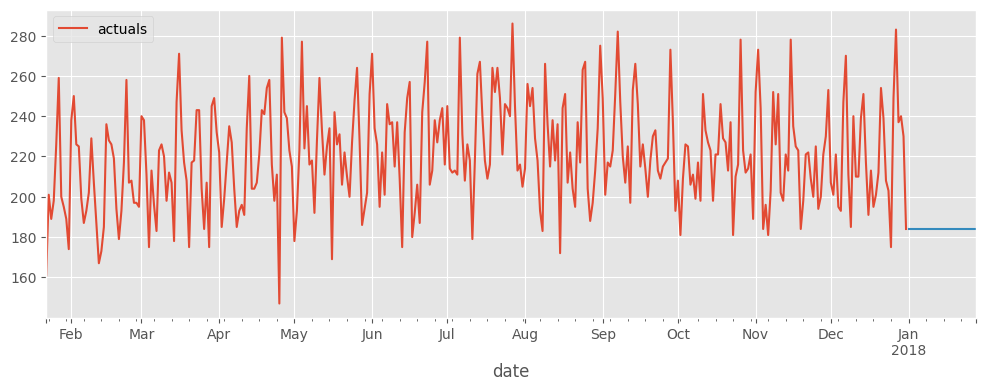

In [118]:
## try commenting/ uncommenting each of the lines below...

# I cannot get this to work

ax = ed_daily.plot(figsize=(12,4))
nf1.fittedvalues.plot(ax=ax, linestyle='-.') # same data, just shifted across by 1 day
preds_as_series(ed_daily, nf1_preds).plot( ax=ax)
plt.show()

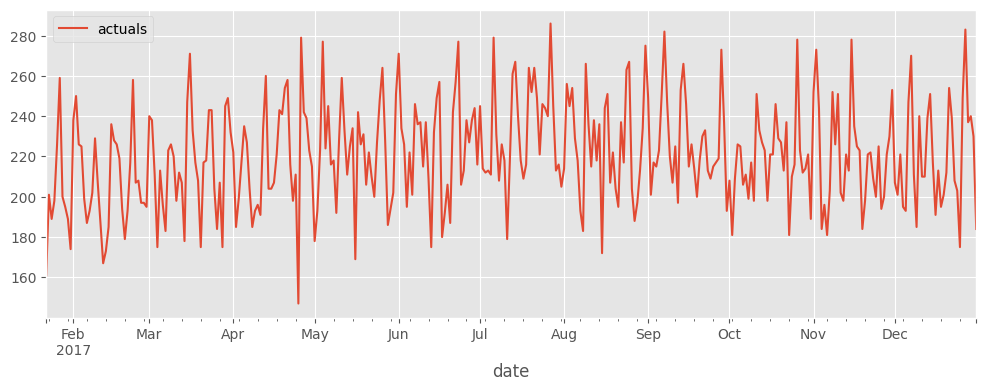

In [119]:
fig, ax = plt.subplots(figsize=(12,4))
ed_daily.plot(ax=ax)
plt.show()

AttributeError: 'Legend' object has no attribute 'legendHandles'

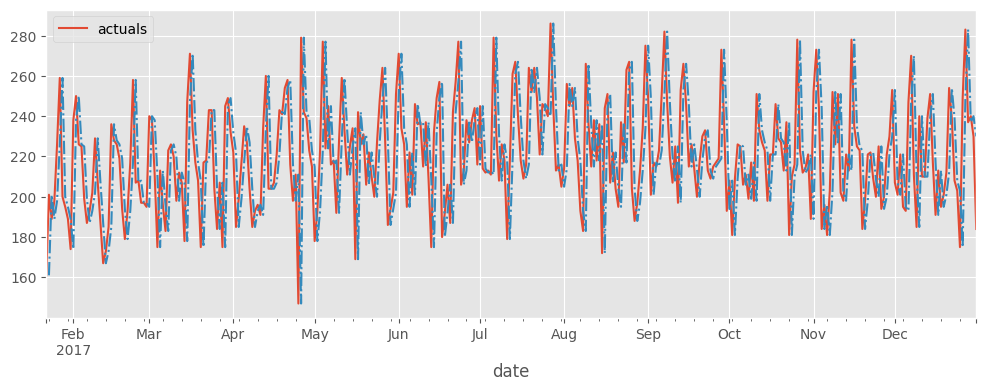

In [108]:
# trying with simple matplotlib insteat


# Create the plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the original data
ed_daily.plot(ax=ax, label='Actual')

# Plot the fitted values
nf1.fittedvalues.plot(ax=ax, linestyle='-.', label='Naive1 Fitted')

# Plot the predictions
preds_as_series(ed_daily, nf1_preds).plot(ax=ax, linestyle='--', label='Naive1 Forecast')

# Set the legend and labels manually
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Naive1 Forecast for ED Daily Data')

plt.tight_layout()
plt.show()

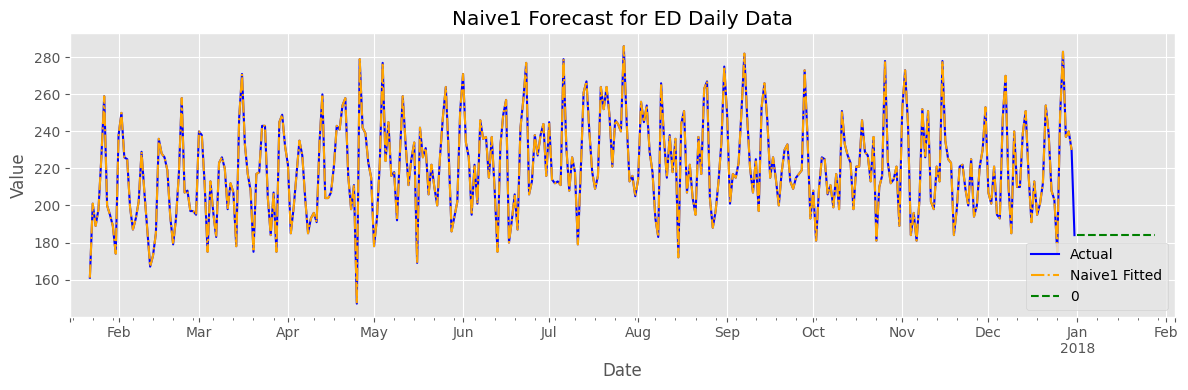

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the original data
ed_daily['actuals'].plot(ax=ax, label='Actual', color='blue')

# Plot the fitted values, shifting them to align with the original data
nf1.fittedvalues.shift(-1).plot(ax=ax, linestyle='-.', label='Naive1 Fitted', color='orange')

# Plot the predictions
preds_series = preds_as_series(ed_daily, nf1_preds)
preds_series.plot(ax=ax, linestyle='--', label='Naive1 Forecast', color='green')

# Set the legend and labels manually
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Naive1 Forecast for ED Daily Data')

# Set x-axis limits to show a bit before and after the data
ax.set_xlim(ed_daily.index[0] - pd.Timedelta(days=7), 
            preds_series.index[-1] + pd.Timedelta(days=7))

plt.tight_layout()
plt.show()

In [111]:
print(nf1.fittedvalues.head()) 
#print(preds_as_series(ed_daily, nf1_preds).head())

date
2017-01-22      NaN
2017-01-23    161.0
2017-01-24    201.0
2017-01-25    189.0
2017-01-26    198.0
Freq: D, Name: pred, dtype: float64


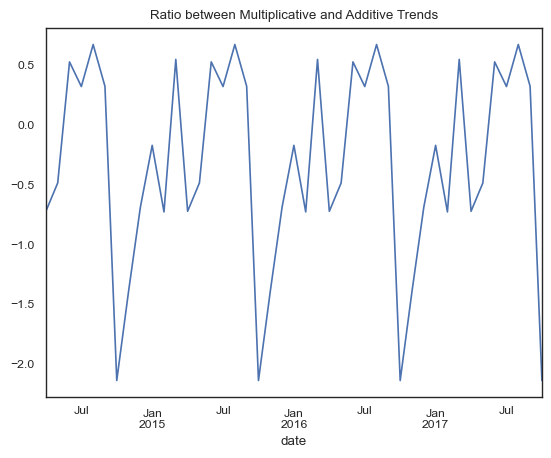

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

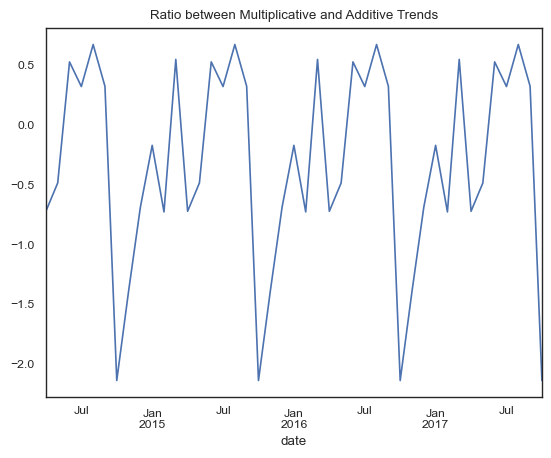

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

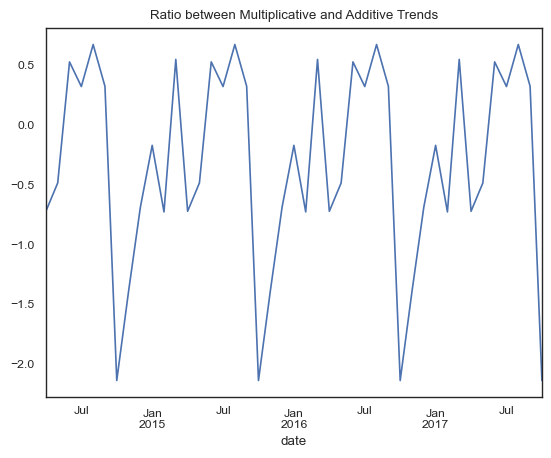

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

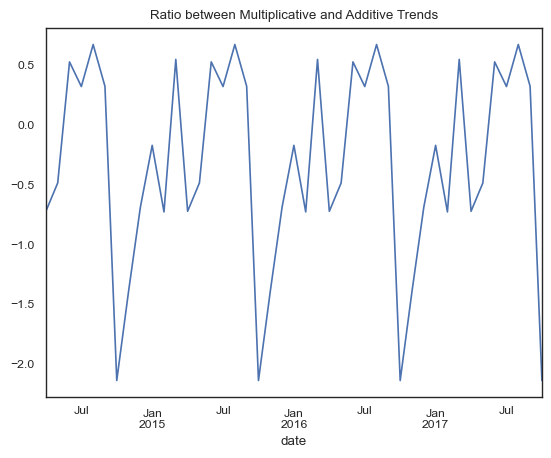

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

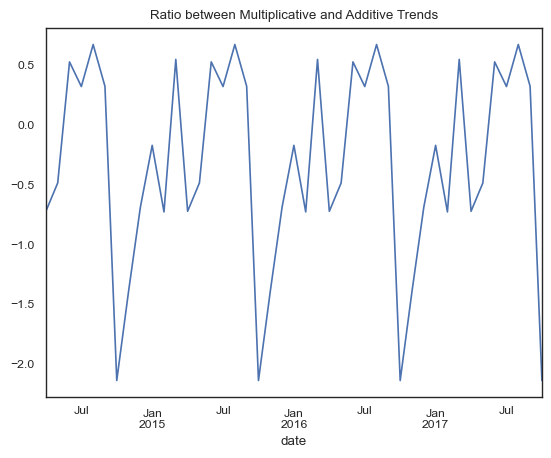

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

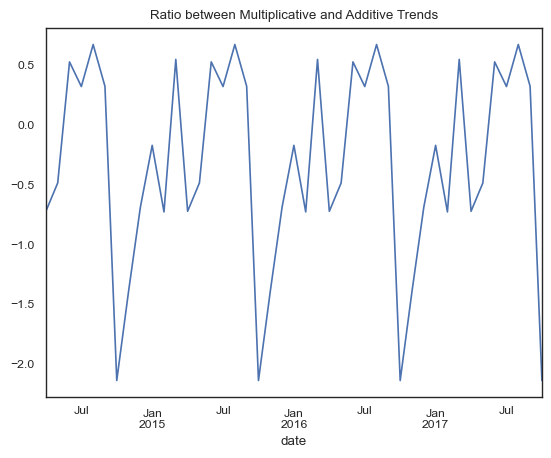

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

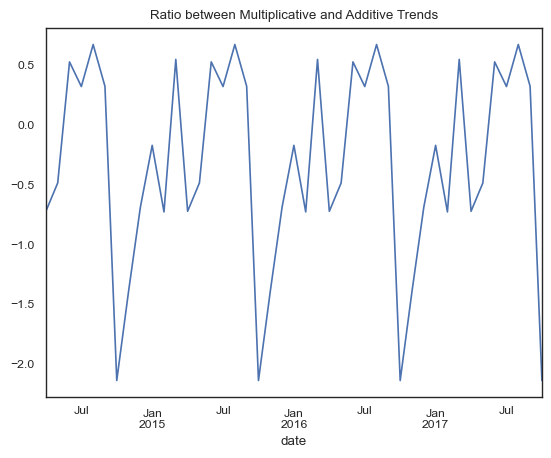

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

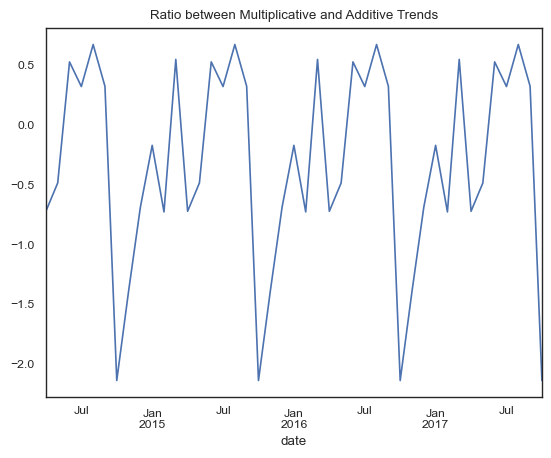

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

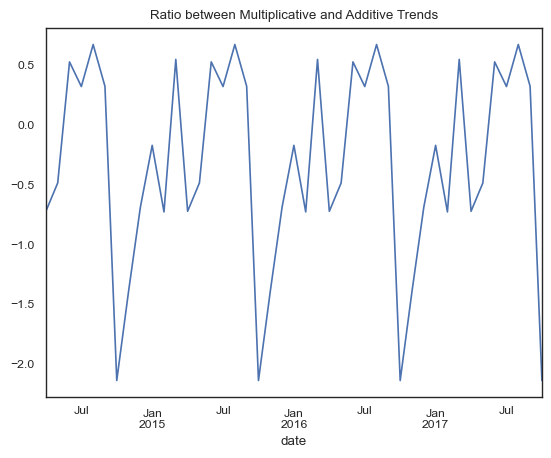

In [ ]:
ratiodf = mult_decomposition.seasonal/add_decomposition.seasonal

   
ratiodf.plot()
plt.title('Ratio between Multiplicative and Additive Trends')
plt.show()

Do you think the above looks good? Answers in the chat...

### Seasonal Naive

Seasonal Naive extends **Naive1** in an attempt to incorporate the seasonality in the data.  Instead of carrying the final value in the time series forward it carries forward the values from the previous time period.  As we are working with monthly data this means that a forecast for Janurary 2019 will use the previous Janurary's observation (2018). A forecast for February 2019 will use the previous February's observation and so on.

In [80]:
from forecast_tools.baseline import SNaive

In [81]:
snf = SNaive(period=7)
snf.fit(ed_daily)
snf_preds = snf.predict(horizon=28)
snf.fittedvalues

date
2017-01-22      NaN
2017-01-23      NaN
2017-01-24      NaN
2017-01-25      NaN
2017-01-26      NaN
              ...  
2017-12-27    212.0
2017-12-28    254.0
2017-12-29    239.0
2017-12-30    208.0
2017-12-31    203.0
Freq: D, Name: pred, Length: 344, dtype: float64

In [82]:
# look at the 8th (onwards) values - how do they compare to the first 7?
snf_preds

array([175., 249., 283., 237., 240., 230., 184., 175., 249., 283., 237.,
       240., 230., 184., 175., 249., 283., 237., 240., 230., 184., 175.,
       249., 283., 237., 240., 230., 184.])

In [83]:
snf_preds[:7]

array([175., 249., 283., 237., 240., 230., 184.])

AttributeError: 'Legend' object has no attribute 'legendHandles'

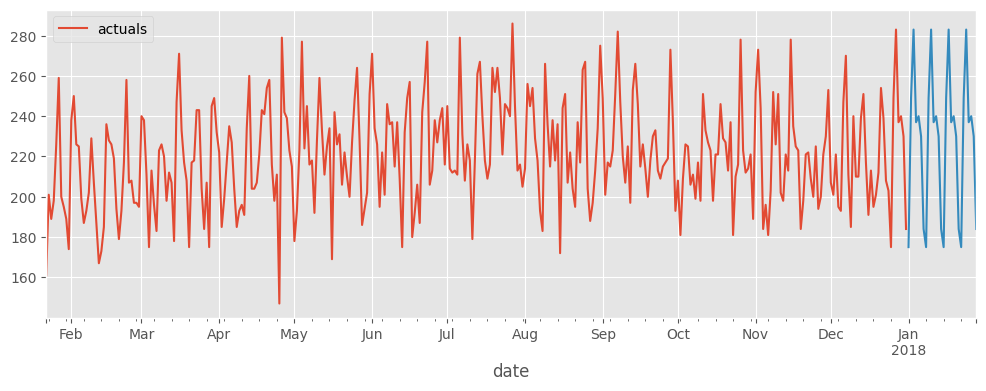

In [84]:
ax = ed_daily.plot(figsize=(12,4))
filtered_snf_fittedvalues = snf.fittedvalues.dropna()
# filtered_snf_fittedvalues.plot(ax=ax, linestyle='-.')
# ax = snf.fittedvalues.dropna().plot(ax=ax, linestyle='-.')
preds_as_series(ed_daily, snf_preds).plot(ax=ax)
_ = ax.legend(['train','Fitted Model', 'SNaive Forecast'])

AttributeError: 'Legend' object has no attribute 'legendHandles'

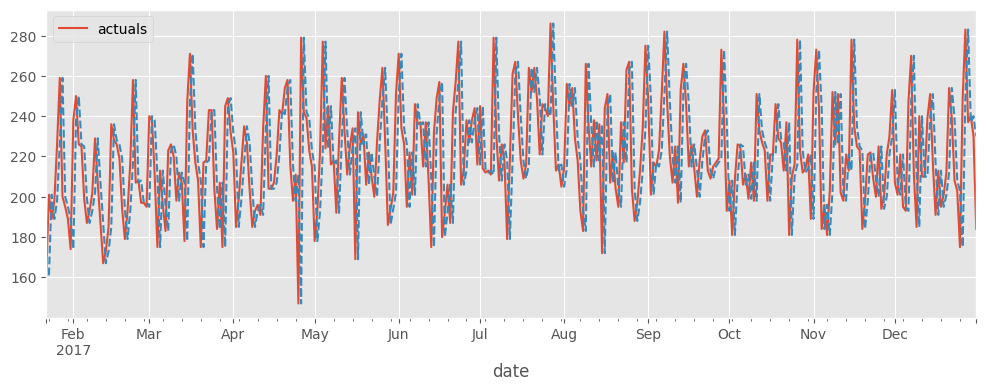

In [120]:
fig, ax = plt.subplots(figsize=(12,4))
ed_daily.plot(ax=ax, label='Actual')
ed_daily.shift(1).plot(ax=ax, linestyle='--', label='Shifted')
ax.legend()
plt.show()

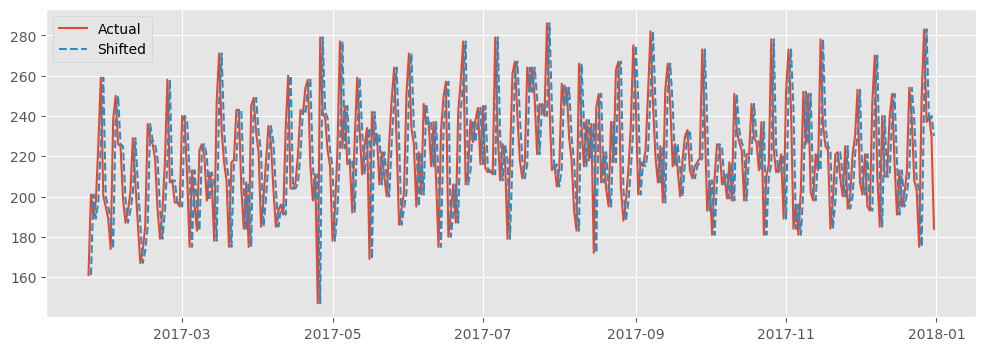

In [121]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(ed_daily.index, ed_daily['actuals'], label='Actual')
ax.plot(ed_daily.index, ed_daily['actuals'].shift(1), linestyle='--', label='Shifted')
ax.legend()
plt.show()

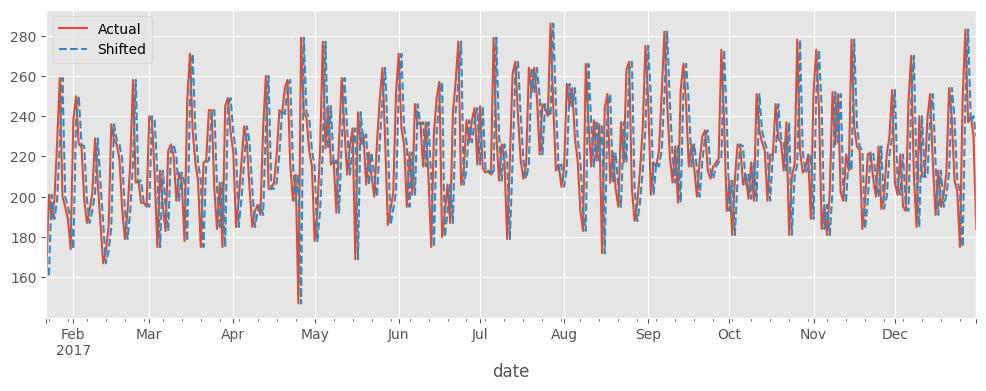

In [122]:
fig, ax = plt.subplots(figsize=(12,4))
ed_daily['actuals'].plot(ax=ax, label='Actual')
ed_daily['actuals'].shift(1).plot(ax=ax, linestyle='--', label='Shifted')
ax.legend()
plt.show()

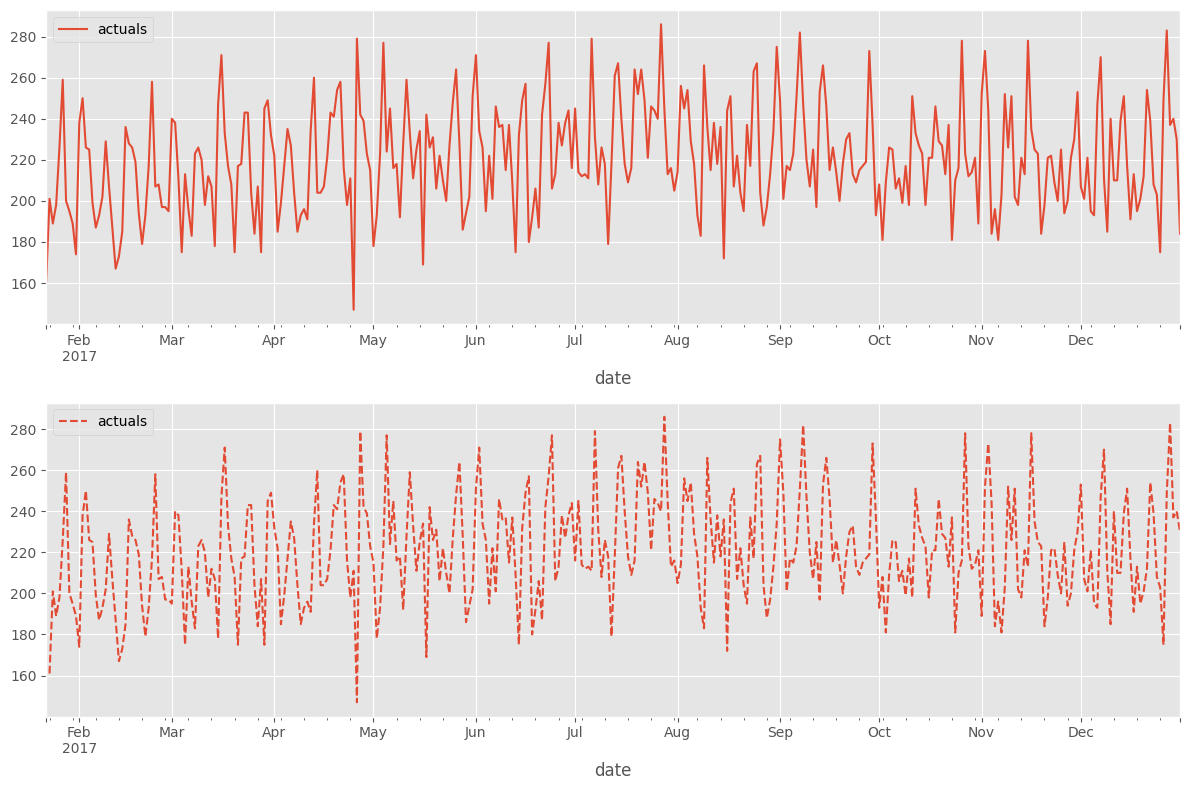

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
ed_daily.plot(ax=ax1, label='Actual')
ed_daily.shift(1).plot(ax=ax2, linestyle='--', label='Shifted')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

In [124]:
print(ed_daily.info())
print(ed_daily.head())
print(type(ed_daily.index))
print(ed_daily.index.dtype)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 344 entries, 2017-01-22 to 2017-12-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   actuals  344 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB
None
            actuals
date               
2017-01-22      161
2017-01-23      201
2017-01-24      189
2017-01-25      198
2017-01-26      226
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
datetime64[ns]


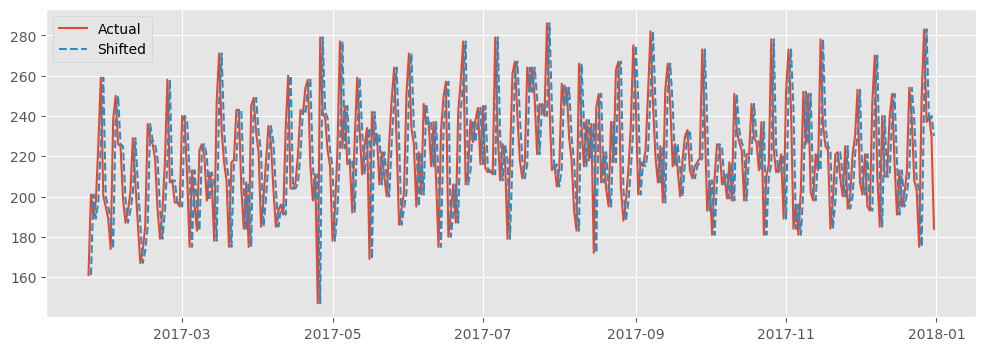

In [125]:
ed_daily_reset = ed_daily.reset_index()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(ed_daily_reset['date'], ed_daily_reset['actuals'], label='Actual')
ax.plot(ed_daily_reset['date'], ed_daily_reset['actuals'].shift(1), linestyle='--', label='Shifted')
ax.legend()
plt.show()

### Prediction Intervals

To return a prediction interval from a baseline forecast object use:

```python
y_preds, y_intervals = model.predict(horizon, return_predict_int=True)
```

By default this returns 80% and 90% PIs.  

To return only the 80% intervals use *(i.e. 1 - alpha)*:

```python
y_preds, y_intervals = model.predict(horizon, 
                                     return_predict_int=True, 
                                     alpha=[0.2])
```

To return, the 80, 90 and 95% intervals use:


```python
y_preds, y_intervals = model.predict(horizon, 
                                     return_predict_int=True, 
                                     alpha=[0.2,0.1,0.05])
```

In [ ]:
snf = SNaive(period=7)
snf.fit(ed_daily)
y_preds, y_intervals = snf.predict(horizon=6, return_predict_int=True, 
                                    alpha=[0.2, 0.05])
y_intervals # array of arrays

In [ ]:
y_intervals[0] # 80% Intervals

In [ ]:
y_intervals[1] # 95% Intervals

In [ ]:
def plot_prediction_intervals(train, preds, intervals, test=None):
    '''
    Helper function to plot training data, point preds
    and 2 sets of prediction intevals
    
    assume 2 sets of PIs are provided!
    
    Params
    ------
    train : pd.DataFrame
        Training data
        
    preds : np.ndarray
        Predictions
        
    intervals : list
        List of arrays of intervals
        
    test : pd.DataFrame
        Test data

    '''
    ax = train.plot(figsize=(12,4))

    mean = preds_as_series(train, preds)
    intervals_80 = preds_as_series(train, intervals[0])
    intervals_90 = preds_as_series(train, intervals[1])

    mean.plot(ax=ax, label='point forecast')

    ax.fill_between(intervals_80.index, mean[0], intervals_80[1], 
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,mean[0], intervals_80[0], 
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,intervals_80[1], intervals_90[1], 
                    alpha=0.2,
                    label='90% PI', color='purple');

    ax.fill_between(intervals_80.index,intervals_80[0], intervals_90[0], 
                    alpha=0.2,
                    label='90% PI', color='purple');
    
    if test is None:
        ax.legend(['train', 'point forecast', '80%PI', '_ignore','_ignore', 
                   '95%PI'], loc=2)
    else:
        test.plot(ax=ax, color='black')
        ax.legend(['train', 'point forecast', 'Test', '80%PI', '_ignore',
                   '_ignore', '90%PI'], loc=2)
    
    

In [ ]:
# to improve readability will include last 60 days only
# blue line = point forecast (mean of forecast distribution)
plot_prediction_intervals(ed_daily[-60:], y_preds, y_intervals)

### Measuring Point Forecast Error.

#### A basic train test split

Let's hold back 28 days of data and calculate the forecast error of Seasonal Naive.

`forecast-tools` helps you calculate forecast error with the `forecast_tools.metrics.forecast_errors` function.  The function calculates a range of metrics.

In [ ]:
ed_daily.shape

In [ ]:
train_length = ed_daily.shape[0] - 28
# array slicing
train, test = ed_daily.iloc[:train_length], ed_daily.iloc[train_length:]

In [ ]:
train.shape

In [ ]:
test.shape

### IMPORTANT - DO NOT LOOK AT THE TEST SET!

We need to **hold back** a proportion of our data.  This is so we can simulate real forecasting conditions and check a models accuracy on **unseen** data.  We don't want to know what it looks like as that will introduce bias into the forecasting process and mean we overfit our model to the data we hold.

**Remember - there is no such thing as real time data from the future!**

In [ ]:
snf = SNaive(period=7)
preds = snf.fit_predict(train, horizon=28)
preds

In [ ]:
from forecast_tools.metrics import forecast_errors # creates range of forecast errors
# below is forecast errors for SNaive
# ~12% error
forecast_errors(test, preds)

In [ ]:
nf1 = Naive1()
# fit_predict = 2 steps in one...
preds = nf1.fit_predict(train, horizon=28)
preds #  i.e., flat forecast

In [ ]:
forecast_errors(test, preds)

How do the percentage errors compare?

In [56]:
import pandas as pd
import matplotlib as mpl
import forecast_tools
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Forecast_tools version: {forecast_tools.__version__}")

Pandas version: 1.5.3
Matplotlib version: 3.9.2
Forecast_tools version: 0.3.0


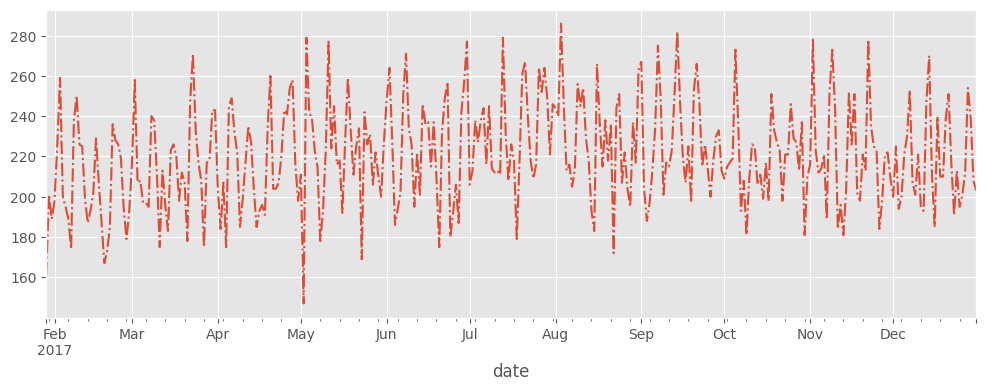

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,4))
filtered_snf_fittedvalues.plot(ax=ax, linestyle='-.')
plt.show()

In [58]:
print(type(filtered_snf_fittedvalues))
print(filtered_snf_fittedvalues.head())
print(filtered_snf_fittedvalues.index.dtype)

<class 'pandas.core.series.Series'>
date
2017-01-29    161.0
2017-01-30    201.0
2017-01-31    189.0
2017-02-01    198.0
2017-02-02    226.0
Freq: D, Name: pred, dtype: float64
datetime64[ns]


In [59]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline
